<h2>学習則</h2>
<h3>ヘッブ則（Hebbian rule）</h3>
<p>心理学者ドナルド・ヘッブが提唱した脳のシナプス可塑性についての法則<br>※可塑性：変化した状態が保たれる性質</p>
<p>結合強度（重み）の変化量をΔw、ニューロンの興奮の度合いをyi、出力をyjとすると</p>
$$
Δw=γy_iy_j
$$

<h3>デルタ則（Delta rule）</h3>
<p>WidrowとHoffらが提唱したニューラルネットワークの学習に関するルール</p>
<p>・出力と正解の差が大きいほど、重みの修正量を大きくする<br>
・入力が大きいほど、重みの修正量を大きくする</p>
<p>ηは学習係数</p>
$$
Δw=η(y_j-t)y_i
$$

<h2>バックプロパケーション</h2>
<p>ニューラルネットワークを学習させる際に用いられるアルゴリズム</p>
<p>出力と正解の誤差がネットワークを逆伝播することによって、重みとバイアスを最適化する</p>
<p>出力値と正解値から誤差を定義するには<b>損失関数</b>を用いる</p>
<p>重みとバイアスを少しずつ更新して誤差を最小化するときに、<b>勾配降下法</b>を用いる</p>

<h2>訓練データとテストデータ</h2>
<p>訓練データとテストデータは多数の入力と正解の組み合わせにより構成される</p>

In [1]:
# 例
[0.54, -0.34, 1.05, 0.21, -0.84]

[0.54, -0.34, 1.05, 0.21, -0.84]

In [3]:
#one-hot表現
[0, 1, 0, 0, 0]

[0, 1, 0, 0, 0]

<h2>損失関数(誤差関数)</h2>
<p>出力と正解の誤差を定義する関数</p>
<p>誤差の値が大きいほど、ニューラルネットワークが望ましい状態から離れていることになる</p>

<h3>二乗和誤差</h3>
<p>ニューラルネットワークの出力がどの程度正解と一致しているかを定量化することができる。<br>
正解や出力が連続的な数値であるケースに向いている(回帰問題)</p>
$$
E=\frac{1}{2}\sum_{k}(y_k-t_k)^2
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def square_sum(y, t):
    return 1.0/2.0 * np.sum(np.square(y - t))

<h3>交差エントロピー誤差</h3>
<p>2つの分布間のずれを表す尺度で、分類問題でよく使われる</p>
$$
E=-\sum_{k}{t_k}log(y_k)
$$
$$
E=\sum_{k}{t_k}(-log(y_k))
$$

In [8]:
def cross_entropy(y, t):
    return - np.sum(t * np.log(y + 1e-7))

<h2>勾配降下法</h2>
あるパラメータx_kの変化量に対する関数y(x_1, x_2, ... , x_k, ...)の変化量の割合
$$
\frac{\partial{y}}{\partial{x_k}}
$$
を求めて、パラメータを調整する

w_ijに対するE(誤差)の変化は必ずしもシンプルな曲線ではなく、勾配=0が複数ある場合があり、全体の最小値にたどり着けないことがある<br>
全体的でない最小値：局所最適解<br>
最小値：大域最適解

<p>重みとバイアスの交信はwを重み、bをバイアス、Eを誤差とすると以下のような式でできる</p>
η:学習係数

$$
w\leftarrow{w}-η\frac{\partial{E}}{\partial{w}}
$$
$$
b\leftarrow{b}-η\frac{\partial{E}}{\partial{b}}
$$

<h3>例：出力層の重みの勾配</h3>
重みの勾配
$$
\frac{\partial{E}}{\partial{w_{jk}}}
$$
をもとめる
以降は
$$
\partial{w_{jk}}と記述
$$

$$
\partial{w_{jk}}=\frac{\partial{E}}{\partial{w_{jk}}}=\frac{\partial{E}}{\partial{u_k}}\frac{\partial{u_k}}{\partial{w_{jk}}}
$$

$$
\frac{\partial{u_k}}{\partial{w_{jk}}}=
\frac{\partial{(\sum_{q=1}^{m}{y_q}{w_{qk}}+b_k})}{\partial{w_{jk}}}\\
=\frac{\partial}{\partial{w_{jk}}}(y_1w_{1k}+y_2w_{2k}+\cdots+y_jw_{jk}+\cdots+y_mw_{mk}+b_k)\\
=y_j
$$

<h2>最適化アルゴリズム</h2>
<ul>
    <li>確率的勾配降下法(SGD)</li>
    <li>Momentum</li>
    <li>AdaGrad</li>
    <li>RMSProp</li>
    <li>Adam</li>
</ul>

<h2>確率的勾配降下法(SGD)</h2>
<p>更新ごとにランダムにサンプルを選び出すアルゴリズム</p>
<p>局所最適解に囚われにくいというメリットがある</p>
<p>デメリットは柔軟に更新量の調整ができない</p>
$$
w\leftarrow{w}-η\frac{\partial{E}}{\partial{w}}\\
b\leftarrow{b}-η\frac{\partial{E}}{\partial{b}}
$$

<h2>Momentum</h2>
<p>確率的勾配降下法に慣性項を付け加えたアルゴリズム</p>
<p>α：慣性の強さを決める定数<br>Δw：前回の更新量</p>
<p>更新量の急激な変化が防がれ、より滑らかな更新が可能</p>
<p>デメリットは調整がより難しくなる点</p>
$$
w\leftarrow{w}-η\frac{\partial{E}}{\partial{w}}+αΔw\\
b\leftarrow{b}-η\frac{\partial{E}}{\partial{b}}+αΔb
$$

<h2>AdaGrad</h2>
<p>Duchiらが提唱したアルゴリズム</p>
<p>更新量が自動的に調整され、調整がラクなところがメリット</p>
<p>学習率は次第に小さくなる</p>
<p>途中で更新量がほぼ0になり、それ以上最適化が進まなくなるのがデメリット</p>
$$
h\leftarrow{h}+(\frac{\partial{E}}{\partial{w}})^2\\
b\leftarrow{w}-η\frac{\partial{1}}{\partial{\sqrt{h}}}\frac{\partial{E}}{\partial{w}}
$$

<h2>RMSProp</h2>
<p>AdaGradの更新量の低下による学習停滞する弱点を克服</p>
<p>Hintonはρに0.9を代入することを推奨している</p>
$$
h\leftarrow{ρh}+(1-ρ)(\frac{\partial{E}}{\partial{w}})^2\\
b\leftarrow{w}-η\frac{\partial{1}}{\partial{\sqrt{h}}}\frac{\partial{E}}{\partial{w}}
$$

<h2>Adam(Adaptive moment estimation)</h2>
<p>Kingmaらが提唱したアルゴリズム</p>
<p>他の様々なアルゴリズムの良い点を併せ持つ</p>
<p>しばしば高い性能を発揮する</p>
$$
m_o=v_0=0\\
m_t=β_1m_{t-1}+(1-β_1)\frac{\partial{E}}{\partial{w}}\\
v_t=β_2v_{t-1}+(1-β_2)(\frac{\partial{E}}{\partial{w}})^2\\
\hat{m}_t=\frac{m_t}{1-β_1^t}\\
\hat{v}_t=\frac{v_t}{1-β_2^t}\\
w\leftarrow{w}-η\frac{\hat{m}_t}{\sqrt{\hat{v}_t}+\epsilon}
$$

<h2>バックプロパゲーションの実装 -回帰-</h2>
<p>中間層の活性化関数：シグモイド関数<br>出力層の活性化関数：恒等関数<br>損失関数：二乗和誤差</p>

In [43]:
#入力と正解
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi)/np.pi
n_data = len(correct_data)

In [44]:
#各設定値
n_in = 1
n_mid = 3
n_out = 1

wb_width = 0.01 #重みとバイアスの広がり具合
eta = 0.1
epoch = 2001
interval = 200

In [45]:
#中間層
class MiddleLayer:
    def __init__(self, n_upper, n):
        #重み(行列)とバイアス(ベクトル)
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x): #順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) # sigmoid
        
    def backward(self, grad_y): #逆伝播
        delta = grad_y * (1 - self.y) * self.y #sigmoidの微分
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): #重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [46]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta,self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [47]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

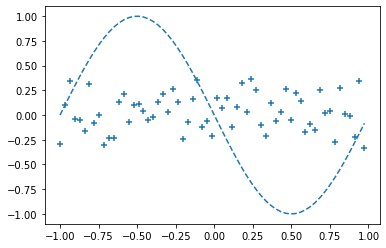

Epoch: 0/2001 Error: 0.2744659277864027


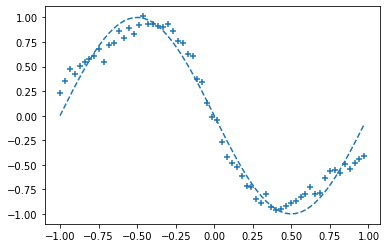

Epoch: 200/2001 Error: 0.008404285099619395


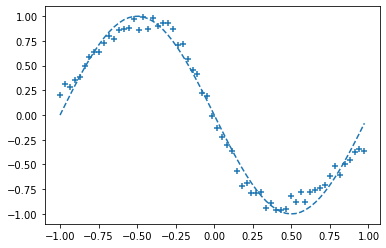

Epoch: 400/2001 Error: 0.004926931353629891


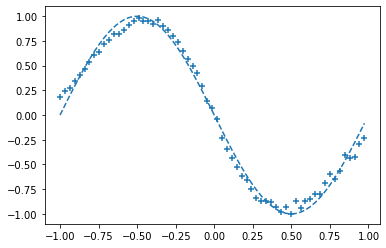

Epoch: 600/2001 Error: 0.002633938801835024


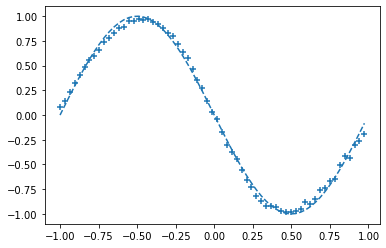

Epoch: 800/2001 Error: 0.0009169445414407243


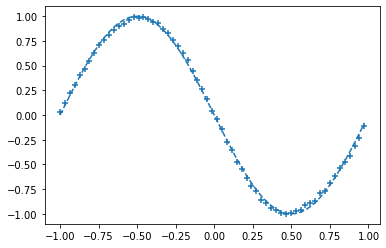

Epoch: 1000/2001 Error: 0.0002736679443291363


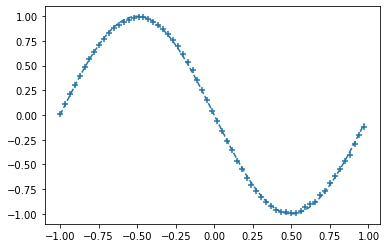

Epoch: 1200/2001 Error: 0.00010817988528188077


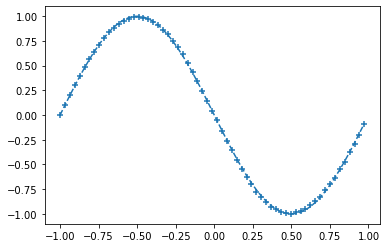

Epoch: 1400/2001 Error: 4.126726755249506e-05


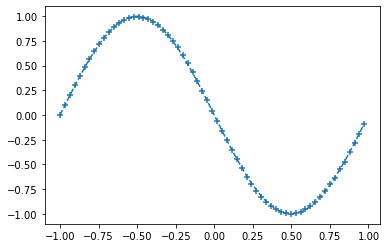

Epoch: 1600/2001 Error: 2.1278164830986176e-05


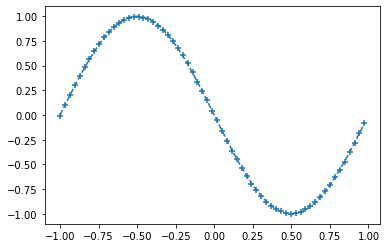

Epoch: 1800/2001 Error: 1.2018670508951173e-05


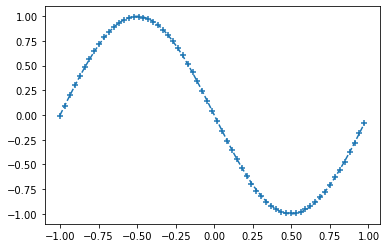

Epoch: 2000/2001 Error: 1.0387181333252725e-05


In [48]:
# --学習--
for i in range(epoch):
    #インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    
    #結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        #順伝播
        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)
        
        #逆伝播
        output_layer.backward(t.reshape(1, 1))
        middle_layer.backward(output_layer.grad_x)
        
        #重みとバイアス更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1) #行列をベクトルに戻す
            
            total_error += 1.0/2.0*np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch: ' + str(i) + "/" + str(epoch),
             "Error: " + str(total_error/n_data))

<h2>バックプロパゲーションの実装 -分類-</h2>
<p>中間層の活性化関数：シグモイド関数<br>出力層の活性化関数：ソフトマックス関数<br>損失関数：交差エントロピー誤差<br>最適化アルゴリズム：確率的勾配降下法<br>バッチサイズ：1</p>

In [56]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data = []
correct_data = []

for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

#設定値
n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

In [57]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [58]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        #softmax
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

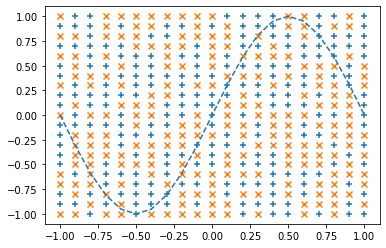

Epoch: 0/101 Error: 0.7159181202448172


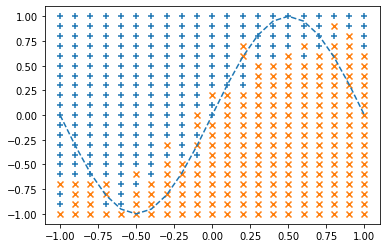

Epoch: 10/101 Error: 0.32156591950419233


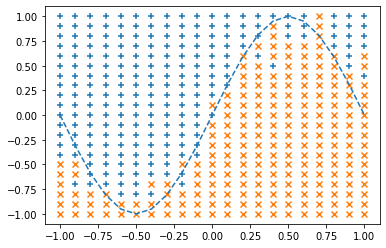

Epoch: 20/101 Error: 0.22027126935403032


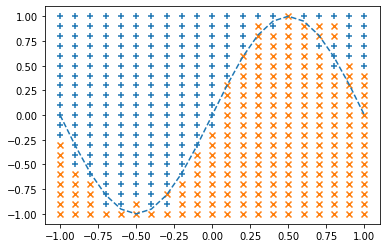

Epoch: 30/101 Error: 0.17314542805491245


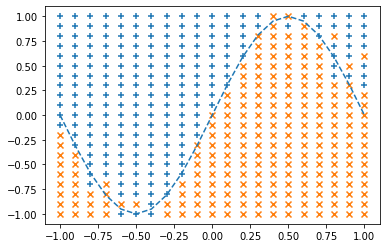

Epoch: 40/101 Error: 0.1372435608895175


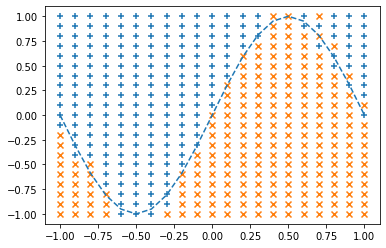

Epoch: 50/101 Error: 0.11107002265220887


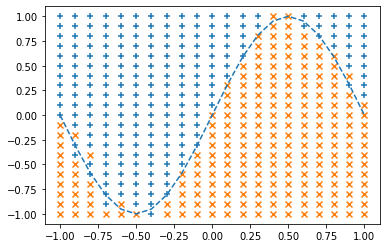

Epoch: 60/101 Error: 0.08722928453984963


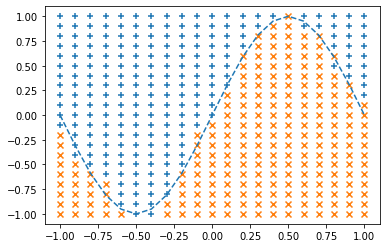

Epoch: 70/101 Error: 0.08628587916624111


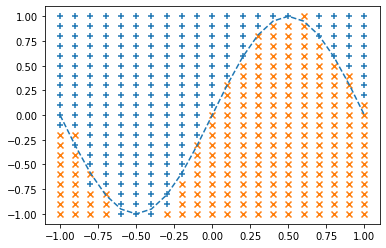

Epoch: 80/101 Error: 0.07857799564785127


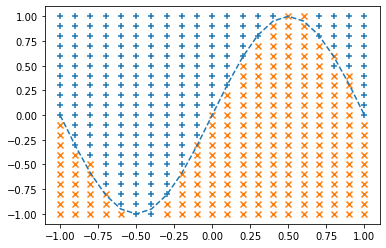

Epoch: 90/101 Error: 0.0766907260061789


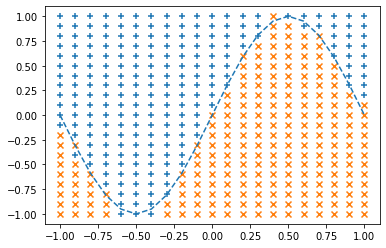

Epoch: 100/101 Error: 0.0787300369108309


In [59]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

sin_data = np.sin(np.pi * X)
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1, 2))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += - np.sum(t * np.log(y + 1e-7))
            
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
        
        
    if i%interval == 0:
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker='+')
        plt.scatter(x_2, y_2, marker='x')
        plt.show()
        
        print('Epoch: ' + str(i) + '/' + str(epoch),
              "Error: " + str(total_error/n_data))